# Project Machine Learning Projcess - Merangkum

- Nama = Riyan Zaenal Arifin
- Email = riyanzaenal411@gmail.com

## Permasalahan Bisnis

Pecemaran udara meupakan hal yang lumrah di kota besar seperti di Jakarta untuk saat ini. Polusi udara di Jakarta disebabkan karena banyaknya penduduk yang masih mengandalkan transportasi berbahan bakar fosil dalam berpergian. Selain itu, polusi udara juga disebabkan oleh pabrik-pabrik di sekitar Jakarta, sehingga polusi udara di Jakarta semakin parah. Bahkan Jakarta masuk dalam kota yang memilki tingkat polusi udara paling tinggi di dunia. Dengan masalah tersebut. Pemerintah daerah tentunya tak tinggal diam begitu saja, pastinya mereka melakukan berbagai cara untuk mengatasi hal tersebut. Namun untuk mempermudah dalam mengatasi hal tersebut seperti memantau kondisi udara perlu membutuhkan beberapa data untuk mengetahui kondisi udara secara manual. Sehingga penulis termotivasi untuk membantu untuk memprediksi kondisi udara melalui beberapa kriteria menggunakan model machine leraning, lalu model machine learning dapat memprediksi kondisi udara, apakah baik atau tidak baik. Untuk model machine learning yang digunakan adalah KNN. Sebelum pemodelan machine learning juga dilakukan proses preprocessing, feature engineering, label encoder, balancing data menggunakan over sampling, dan lain-lain, sehingga bisa diperoleh model yang optimal. Dengan begitu, model machine learning tersebut bisa diaplikasikan untuk memudahkan dalam mengetahui kondisi udara di jakarta, sehingga dapat diperoleh untuk pengambilan keputusan yang lebih lanjut dari pihak pemerintah dalam menangani polusi udara di Jakarta.

## Objektive Bisnis

Objektif project ini dibuat agar pihak pemrov DKI Jakarta mudah dalam mengetahui kondisi udara 

## Metrik Bisnis

Matrik bisnis di project ini adalah agar mempermudah dalam pengambilan kebijakan ketika tahu kondisi udara di DKI Jakarta. Seperti mempersingkat waktu dalam mengetahui kondisi udara di Jakarta. Sehingga kinerja lebih efesien

## Solusi Machine Learning

Solusi yang diberikan penulis dalam permasalan tersebut adalah membuat model machine learning untuk memprediksi kondisi udara, apakah baik atau tidak sehat. Model machine learning yang diusulkan tentu sesuai dengan kondisi data. Dalam project ini data yang digunakan relatif sedikit, sehingga penulis menyarankan menggunakan malgoritma decission tree.

## Metrik Machine Learning

Metrik Machine Learning di project ini tentunya tergantung dari data yang digunakan di project ini, jika nantinya ada feature lain yang mempengaruhi label, maka perlu diretraining ulang. Namun jika tidak, project ini bisa mempersingkat waktu dalam mengetahui kondisi udara, karena dapat memprediksi saat itu juga dengan data-data yang dimasukan

## Insight Hasil Eksplorasi

### Import library

In [18]:
import src.util as utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

In [21]:
config = utils.load_config()

In [24]:
def load_dataset(params: dict) -> pd.DataFrame:
    # Load train set
    dataset = utils.pickle_load(params["dataset_cleaned_path"])

    return dataset

In [26]:
dataset = load_dataset(config)
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,0,59,83,22,18,19,35,83,2,1
1,0,59,84,21,20,24,38,84,2,1
2,0,54,76,22,20,17,41,76,2,1
3,0,63,87,20,13,14,30,87,2,1
4,0,59,79,23,20,19,38,79,2,1
...,...,...,...,...,...,...,...,...,...,...
1427,3,56,102,39,10,27,22,102,2,0
1428,3,61,110,41,10,25,22,110,2,0
1429,1,77,108,53,12,44,21,108,2,0
1430,3,60,110,42,10,33,25,110,2,0


### Check Distrbution

#### Column stasiun

[Text(0, 0, '228'),
 Text(0, 0, '280'),
 Text(0, 0, '277'),
 Text(0, 0, '454'),
 Text(0, 0, '193')]

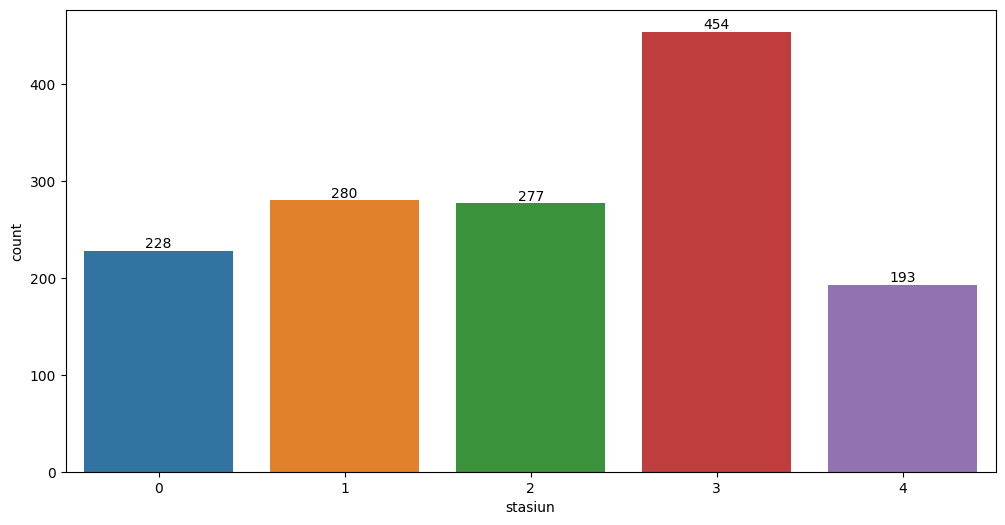

In [27]:
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(data = dataset, x = "stasiun", label = dataset["stasiun"].value_counts())
plt.bar_label(ax.containers[0])

Berdasarkan hasil visualisasi di atas, diperoleh stasiun dengan kode 3 memiliki jumlah yang paling banyak dibanding stasiun lainnnya.

#### Column critical

[Text(0, 0, '2'), Text(0, 0, '14'), Text(0, 0, '1398'), Text(0, 0, '18')]

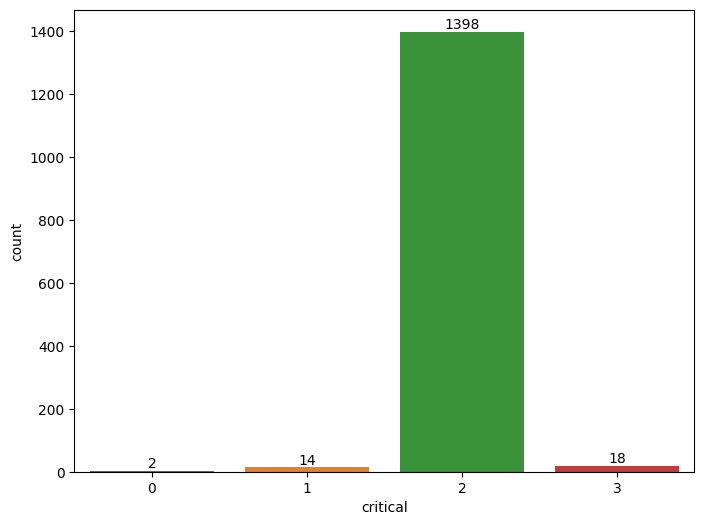

In [28]:
plt.figure(figsize=(8, 6)) 
ax = sns.countplot(data = dataset, x = "critical", label = dataset["critical"].value_counts())
plt.bar_label(ax.containers[0])

Berdasarkan hasil visualisasi di atas, diperoleh kategori critical dengan kode 2 memiliki jumlah yang paling banyak dibanding stasiun lainnnya, yaitu sebesar 1398, jauh lebih tinggi. 

#### Column categori

[Text(0, 0, '716'), Text(0, 0, '716')]

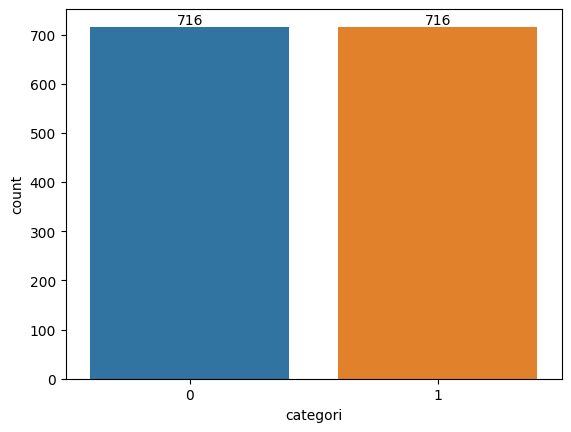

In [29]:
ax = sns.countplot(data = dataset, x = "categori", label = dataset["categori"].value_counts())
ax.bar_label(ax.containers[0])

Karena sebelumnya sudah dilakukan teknik balancing menggunakan SMOTE, jadi untuk jumlah di kategori categori sama.

### Check distribution and boxplot

#### column pm10

<Axes: xlabel='pm10', ylabel='Density'>

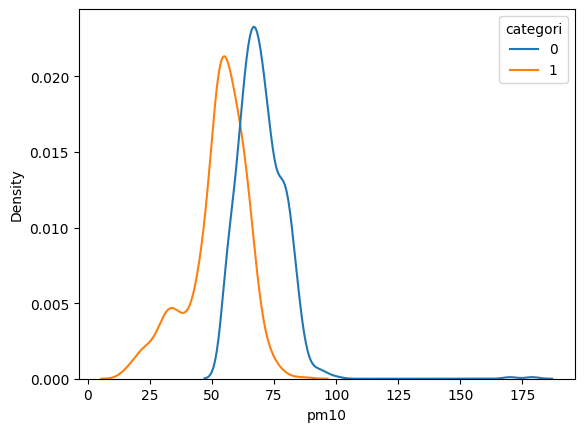

In [30]:
sns.kdeplot(data = dataset, x = "pm10", hue = "categori")

<Axes: xlabel='pm10'>

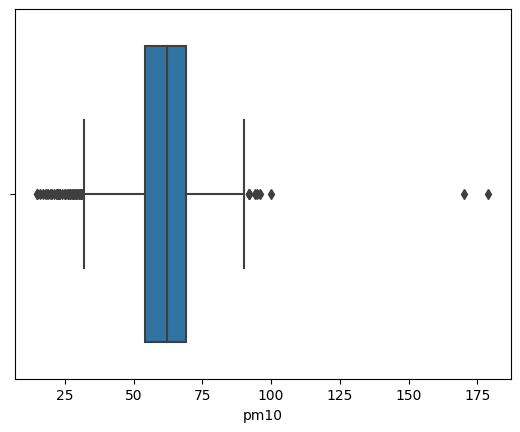

In [38]:
sns.boxplot(data = dataset, x = "pm10")

Berdasarkan hasil visualisasi di atas, diperoleh bahwa untuk density rata-rata categori 0 lebih tinggi dan radiusnya juga lebih tinggi daripada categori 1, nilai density categori 0 lebih tinggi daripada kategori 1. Sedangkan untuk boxplot terdapat 2 nilai yang anomali

#### column pm25

<Axes: xlabel='pm25', ylabel='Density'>

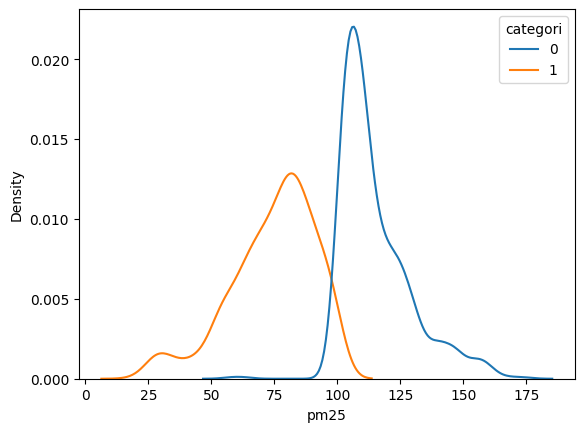

In [31]:
sns.kdeplot(data = dataset, x = "pm25", hue = "categori")

<Axes: xlabel='pm25'>

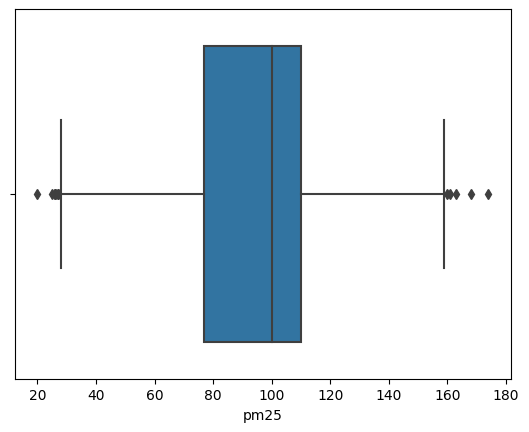

In [39]:
sns.boxplot(data = dataset, x = "pm25")

Berdasarkan hasil visualisasi di atas, diperoleh bahwa untuk density rata-rata categori 0 lebih tinggi dan radiusnya juga lebih tinggi daripada categori 1, nilai density categori 0 lebih tinggi daripada kategori 1. Sedangkan untuk boxplot terdapat tidak ada data yang anomali.

#### column so2

<Axes: xlabel='so2', ylabel='Density'>

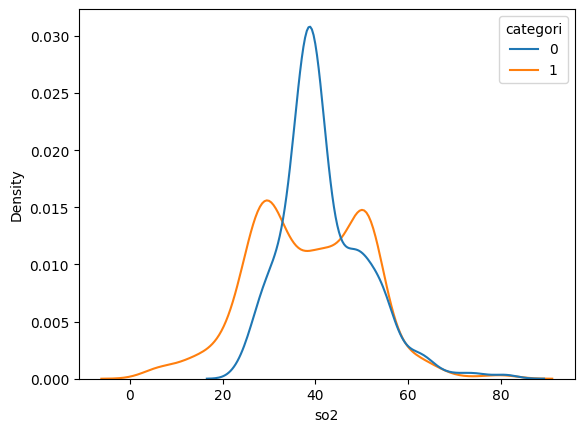

In [32]:
sns.kdeplot(data = dataset, x = "so2", hue = "categori")

<Axes: xlabel='so2'>

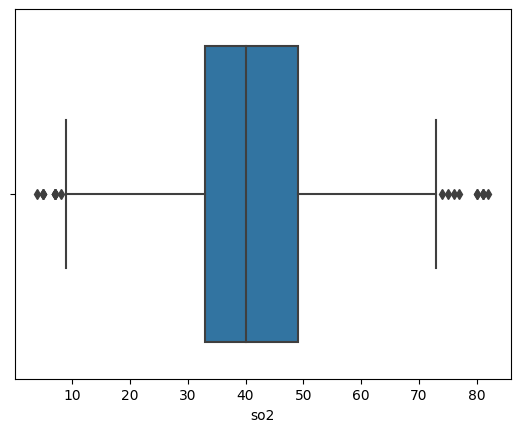

In [40]:
sns.boxplot(data = dataset, x = "so2")

Berdasarkan hasil visualisasi di atas, diperoleh bahwa untuk density rata-rata categori 0 lebih tinggi, tetapi radiusnya lebih tinggi daripada categori 1, nilai density categori 0 lebih tinggi daripada kategori 1. Sedangkan untuk boxplot terdapat tidak ada data yang anomali.

#### column co

<Axes: xlabel='co', ylabel='Density'>

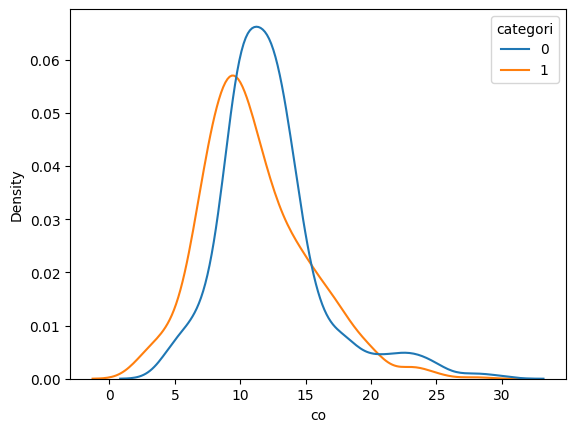

In [33]:
sns.kdeplot(data = dataset, x = "co", hue = "categori")

<Axes: xlabel='co'>

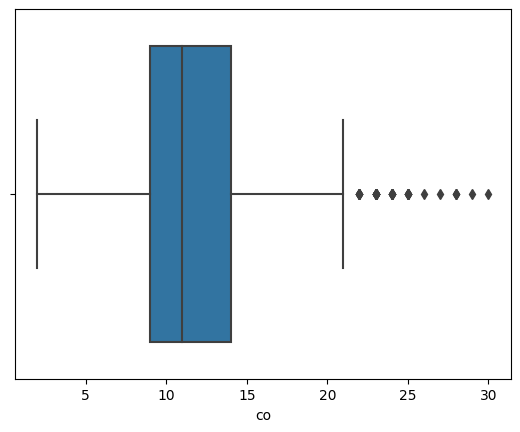

In [41]:
sns.boxplot(data = dataset, x = "co")

Berdasarkan hasil visualisasi di atas, diperoleh bahwa untuk density rata-rata categori 0 lebih tinggi, radiusnya hampir sama dengan categori 1, nilai density categori 0 lebih tinggi daripada kategori 1. Sedangkan untuk boxplot terdapat tidak ada data yang anomali yang sangat jauh.

#### column o3

<Axes: xlabel='o3', ylabel='Density'>

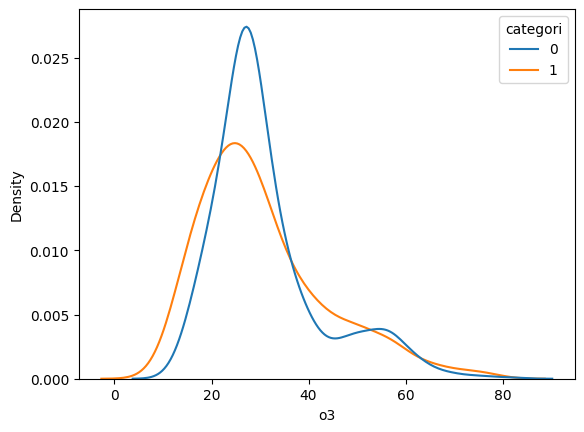

In [34]:
sns.kdeplot(data = dataset, x = "o3", hue = "categori")

<Axes: xlabel='o3'>

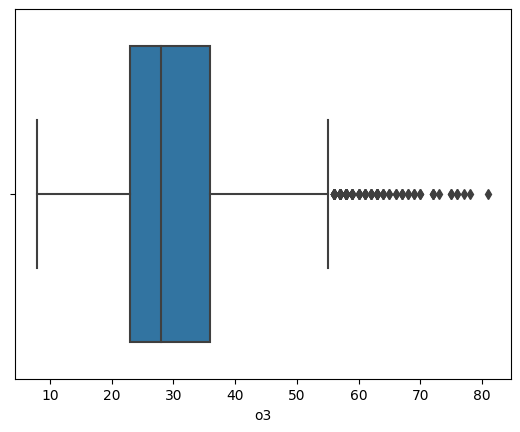

In [42]:
sns.boxplot(data = dataset, x = "o3")

Berdasarkan hasil visualisasi di atas, diperoleh bahwa untuk density rata-rata categori 0 lebih tinggi, radiusnya hampir sama dengan categori 1, nilai density categori 0 lebih tinggi daripada kategori 1. Sedangkan untuk boxplot terdapat tidak ada data yang anomali jauh.

#### column no2

<Axes: xlabel='no2', ylabel='Density'>

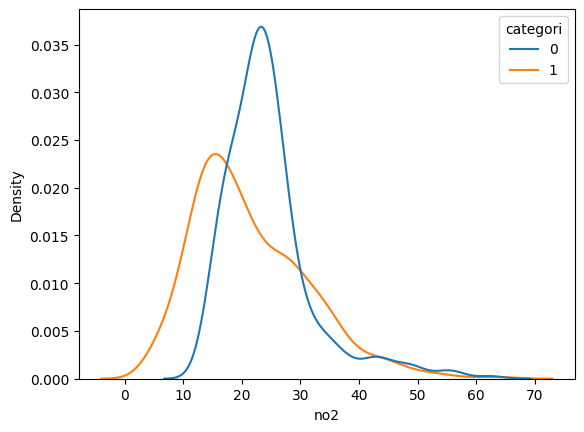

In [35]:
sns.kdeplot(data = dataset, x = "no2", hue = "categori")

<Axes: xlabel='no2'>

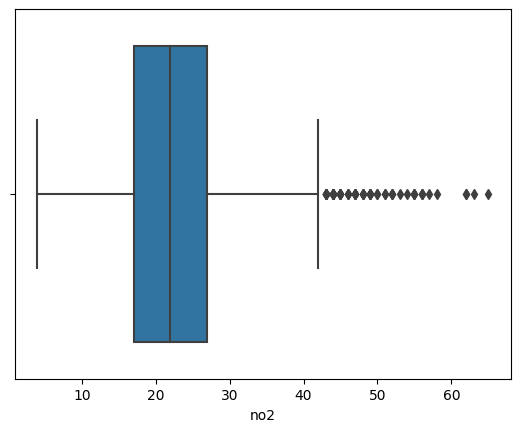

In [43]:
sns.boxplot(data = dataset, x = "no2")

Berdasarkan hasil visualisasi di atas, diperoleh bahwa untuk density rata-rata categori 0 lebih tinggi, radius categori 1  lebih tinggi daripada categori 0, nilai density categori 0 lebih tinggi daripada kategori 1. Sedangkan untuk boxplot terdapat tidak ada data yang anomali jauh.

#### column max

<Axes: xlabel='max', ylabel='Density'>

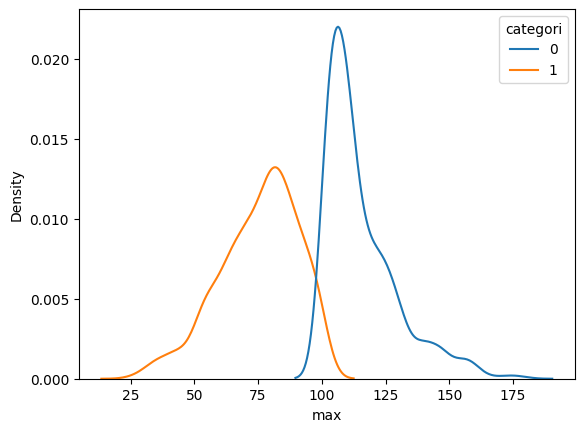

In [36]:
sns.kdeplot(data = dataset, x = "max", hue = "categori")

<Axes: xlabel='max'>

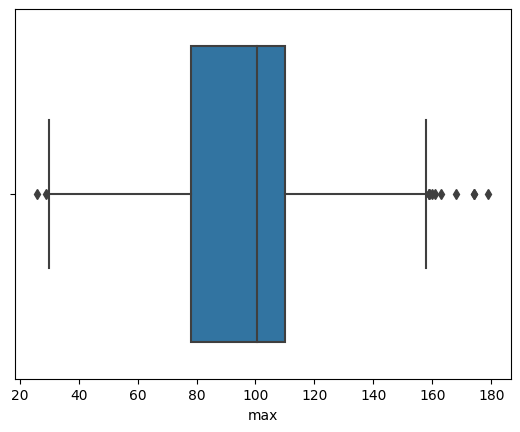

In [44]:
sns.boxplot(data = dataset, x = "max")

Berdasarkan hasil visualisasi di atas, diperoleh bahwa untuk density rata-rata categori 0 lebih tinggi, radius categori 0 lebih tinggi daripada categori 1, nilai density categori 0 lebih tinggi daripada kategori 1. Sedangkan untuk boxplot terdapat tidak ada data yang anomali jauh.

### Heatmap correlation

<Axes: >

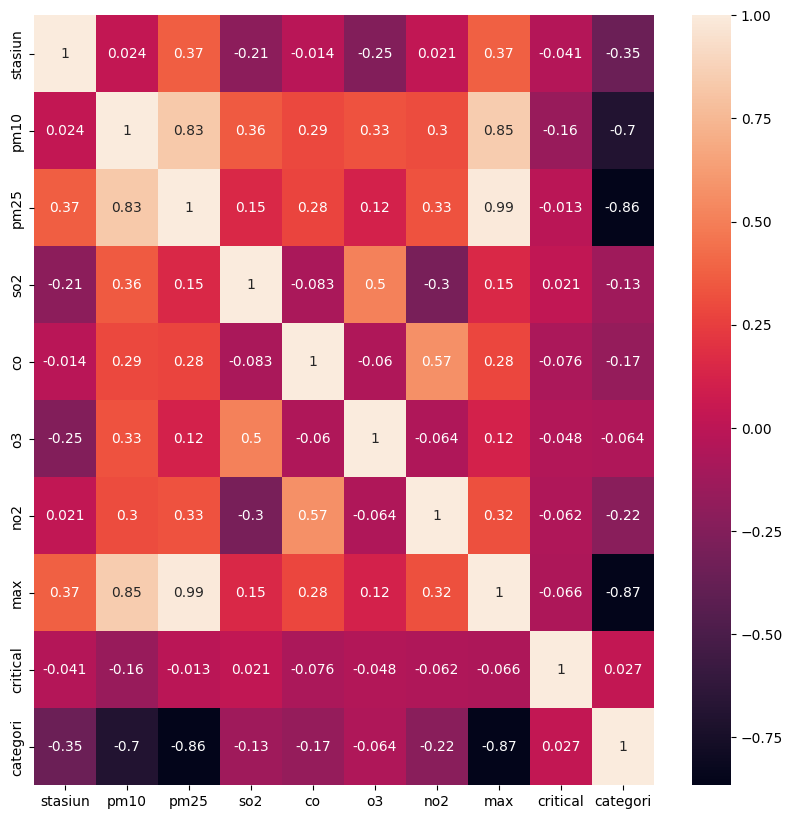

In [37]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(dataset.corr(method = "spearman"), annot = True, ax = ax)

Berdasarkan visualisasi di atas diperoleh bahwa semua kolom memilki korelasi yang lemah terhadap kolom categori karena di bawah 0,5. Langkah ini biasanya untuk feature engineering setelah dilakukan pemodelan dan hasil evaluasinya masih kurang bagus, jika hasil evaluasi sudah bagus maka tidak diharuskan memakai cara ini.

### Kesimpulan 

Berdasarkan hasil EDA diatas, data tidak begitu terlalu signifikan untuk dibersihkan lagi. Namun semua keputusan ada dipribadi masing-masing. Penulis memutuskan untuk tidak lagi membersihkan data, karena tingkat anomali, dll tidak begitu signifikan dan ditakutkan menghilangkan data-data yang penting. Sehingga penulis langsung masuk ke pemodelan 